<a href="https://colab.research.google.com/github/chacha86/pythonai/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 텐서플로, 파이토치


## 프레임워크, 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras


In [4]:
# 데이터셋 불러오기 -> MNIST

fashion_mnist = keras.datasets.fashion_mnist

(trd, trt), (tsd, tst) = fashion_mnist.load_data() # 학습용과 테스트용으로 분리되어서 제공

In [7]:
# 데이터 셋 모양 확인

print(trd.shape, trt.shape)
print(tsd.shape, tst.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [74]:
# 타입 확인
print(trd.dtype)
print(trt.dtype)
print(tsd.dtype)
print(tst.dtype)



uint8
uint8
uint8
uint8


In [15]:
import numpy as np

# 값 확인
np.unique(trd)



784

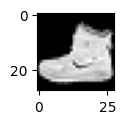

In [24]:
# 이미지 출력
import matplotlib.pyplot as plt



plt.figure(figsize=(1, 1))
plt.imshow(trd[0], cmap='gray')
plt.show()

In [ ]:

plt.figure(figsize=(1, 1))
plt.imshow(trd[1], cmap='gray')
plt.show()

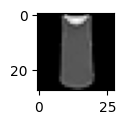

In [21]:
def my_imshow(img) :
  plt.figure(figsize=(1, 1))
  plt.imshow(img, cmap='gray')
  plt.show()

my_imshow(trd[2])

In [ ]:
# 레이블 이름 저장.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[trt[9]]

my_imshow(trd[9])

In [37]:
## 모델 레이어 세팅 -> 다중분류

model = keras.models.Sequential() # 기본적인 신경망 모델
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## 파라미터값 확인해보기
model.layers[3].get_weights()

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [41]:
## 모델 세부 세팅

model.compile(
  loss = "sparse_categorical_crossentropy", 
  optimizer = "sgd",
  metrics = ["accuracy"]
)



In [ ]:
## 학습 시키기

model.fit(trd, trt, epochs=5)

In [58]:
np.unique(trd)

## 스케일링 -> 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

reshaped_trd = trd.reshape(60000, 28 * 28)
scaled_reshaped_trd = ss.fit_transform(reshaped_trd)
scaled_trd = scaled_reshaped_trd.reshape(60000, 28, 28)


(60000, 28, 28)